# Введение в искусственные нейронные сети

# Часть 3. TensorFlow

---
* TF оперировал раньше статическими графами: сначала граф -> вычисления, Pytorch строил динамические графы. Сейчас tf делает и то, и то. 
* Фактически все что можно сделать на tf можно сделать в pytoch, однако что касается production, то лучше конечно использовать tf. Pytorch крут именно для исследований. 
* В tensorflow используем когда keras сам не может. 
* Мы сейчас используем TensorFlow 2.0. Очень простое API, пишем код на ноутбуке и этот же код легко запускается в рабочем сервере. Scalable (масштабируемость) - тестируется в гугле, делпоится везде.
* Tensor - основа. У них есть имя, форма и типы (типы данных в тензоре).
* Tensor - способ выделения памяти.




---

## Содержание методического пособия:


<ol>
<li>Что такое TensorFlow</li>
<li>Основы синтаксиса TensorFlow</li>
<li>Пример нейросети на TensorFlow</li>
</ol>

## Что такое TensorFlow

TensorFlow - это фреймворк для создания ML моделей. TensorFlow предназначен в первую очередь для Deep Learning, т.е. создания современных нейросетей. Однако в TensorFlow также есть поддержка некоторых классических ML алгоритмов: K-means clustering, Random Forests, Support Vector Machines, Gaussian Mixture Model clustering, Linear/logistic regression.

TensorFlow выпустила компания Google в 2015. TensorFlow - это opensource проект. На данный момент это один из основных инструментов для создания нейросетей в рабочих целях. TensorFlow позволяет создавать нейронные сети как для кластеров из большого количества вычислительных устройств, так и для устройств с относительно небольшой вычислитей мощностью, таких как смартфоны и одноплатные компьютеры.

TensorFlow применяется самой компанией Google для ее поиска, почты, переводчика, распознования голоса, внутренних нужд наподобие мониторинга оборудования. TensorFlow используется различными компаниями для различных проектов связанных с компьютерным зрением, решением задач ранжирования и т.д.


## Основы синтаксиса TensorFlow

Процесс создания нейросети на TensorFlow схож с разобранным нами процессом обучения нейросети на Keras. Отличее здесь в том, что здесь нам нужно прописать больше деталей в коде. 

Название TensorFlow означает поток тензоров. Тензоры - это массивы. Данные в компьютере предствлены часто в виде массивах и работа с этими массивами подразумевает их преобразования. Преобразования осуществляются через, к примеру, математические операции. Работа TensorFlow складывается из цепочки преобразований тензоров, т.е. данных. Сами операции осуществляющие преобразование данных представлены в TensorFlow в виде графов. Особенностью TensorFlow версии 1 является то, что сначала необходимо декларировать переменные и вычисления, которые будут совершенны над ними, а потом уже непосредственно запускать работу над данными. 

Давайте рассмотрим базовые вещи в синтаксисе Tensorflow 2.

Выведем строку Hello world, а также версию tensorflow

In [1]:
# в google colab:
# !pip install --upgrade pip
# !pip install tensorflow
# !pip install tf-nightly

In [2]:
import tensorflow as tf
print(tf.__version__)
msg = tf.constant('TensorFlow 2.0 Hello World')
tf.print(msg)

2.10.1
TensorFlow 2.0 Hello World


Пример создания тензора:

In [3]:
A = tf.constant([[3,2],
                 [5,2]])
print(A)

tf.Tensor(
[[3 2]
 [5 2]], shape=(2, 2), dtype=int32)


In [4]:
w = tf.Variable([[1.],[2.]])
print(w)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[1.],
       [2.]], dtype=float32)>


Примеры переменных и констант

Тензор, заполненный единицами:

In [5]:
x = tf.ones(shape=(3,2,1))
print(x)

tf.Tensor(
[[[1.]
  [1.]]

 [[1.]
  [1.]]

 [[1.]
  [1.]]], shape=(3, 2, 1), dtype=float32)


Тензор, заполненный нулями:

In [6]:
x = tf.zeros(shape=(3,2,1))
print(x)

tf.Tensor(
[[[0.]
  [0.]]

 [[0.]
  [0.]]

 [[0.]
  [0.]]], shape=(3, 2, 1), dtype=float32)


Приме сложения тензеров:

In [7]:
B = tf.constant([[9, 5], 
                 [1, 3]])

In [8]:
AB = tf.concat(values=[A, B], axis=1)
print(AB.numpy())

[[3 2 9 5]
 [5 2 1 3]]


Пример изменения размерности тензора:

In [9]:
tensor = tf.constant([[3, 2], 
                      [5, 2], 
                      [9, 5], 
                      [1, 3]])
tensor.shape

TensorShape([4, 2])

In [10]:
tensor = tf.constant([[3, 2], 
                      [5, 2], 
                      [9, 5], 
                      [1, 3]])

resh_tensor = tf.reshape(tensor = tensor, shape = [1, 8]) 

print(f'BEFORE {tensor.numpy()}')
print(f'AFTER {resh_tensor.numpy()}')

BEFORE [[3 2]
 [5 2]
 [9 5]
 [1 3]]
AFTER [[3 2 5 2 9 5 1 3]]


Пример умножения матриц, одной из самых частых операций в машинном обучении - 

In [11]:
A = tf.constant([[3, 7], 
                 [1, 9]])


B = tf.constant([[10, 10],
                 [1000, 1000]])

AB = tf.multiply(A, B)
print(AB)

tf.Tensor(
[[  30   70]
 [1000 9000]], shape=(2, 2), dtype=int32)


Пример создания рандомного тезнора:

In [12]:
x = tf.random.normal(shape=(3,1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 0.93670034]
 [-0.5844427 ]
 [ 0.98508644]], shape=(3, 1), dtype=float32)


In [13]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3,2,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 2, 1) dtype=float32, numpy=
array([[[ 0.7723517],
        [-0.2497578]],

       [[ 1.4908258],
        [ 1.8975925]],

       [[-1.0249121],
        [ 1.227872 ]]], dtype=float32)>


Как менять состояние переменной?

In [14]:
v.assign(tf.ones((3,2,1)))

<tf.Variable 'UnreadVariable' shape=(3, 2, 1) dtype=float32, numpy=
array([[[1.],
        [1.]],

       [[1.],
        [1.]],

       [[1.],
        [1.]]], dtype=float32)>

In [15]:
v[0, 0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 2, 1) dtype=float32, numpy=
array([[[3.],
        [1.]],

       [[1.],
        [1.]],

       [[1.],
        [1.]]], dtype=float32)>

Пример изменения размерности:

In [16]:
tensor = tf.constant([[3, 2], 
                      [5, 2], 
                      [9, 5], 
                      [1, 3]])

resh_tensor = tf.reshape(tensor = tensor, shape = [1, 8]) 

print(f'BEFORE {tensor.numpy()}')
print(f'AFTER {resh_tensor.numpy()}')

BEFORE [[3 2]
 [5 2]
 [9 5]
 [1 3]]
AFTER [[3 2 5 2 9 5 1 3]]


Пример сложения тензора:

In [17]:
B = tf.constant([[9, 5], 
                 [1, 3]])

AB = tf.concat(values=[A, B], axis=1)
print(AB.numpy())

[[3 7 9 5]
 [1 9 1 3]]


In [18]:
A = tf.constant([[2, 2], 
                 [2, 2]])

B = tf.constant([[9, 5], 
                 [1, 3]])

A + B

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[11,  7],
       [ 3,  5]])>

Для переменных можно добавлять тензоры (сложение)

In [19]:
v.assign_add(tf.ones((3,2,1)))

<tf.Variable 'UnreadVariable' shape=(3, 2, 1) dtype=float32, numpy=
array([[[4.],
        [2.]],

       [[2.],
        [2.]],

       [[2.],
        [2.]]], dtype=float32)>

Пример умножения матриц, одной из частых операций в машинном обучении (ЭТО НЕ МАТРИЧНОЕ УМНОЖЕНИЕ):

In [20]:
A = tf.constant([[3, 7], 
                 [1, 9]])

B = tf.constant([[10, 10],
                 [1000, 1000]])

AB = tf.multiply(A, B)
print(AB)

tf.Tensor(
[[  30   70]
 [1000 9000]], shape=(2, 2), dtype=int32)


Матричное умножение:

In [21]:
x = tf.matmul([[5]],[[2, 3]])
print(x)
print(x.shape)
print(x.dtype)

tf.Tensor([[10 15]], shape=(1, 2), dtype=int32)
(1, 2)
<dtype: 'int32'>


Работа тензора с функиями:

In [22]:
a = tf.ones((2,2)) * 2
print(a)

tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)


In [23]:
b = tf.square(a)
print(b)

tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


In [24]:
c = tf.sqrt(a)
print(c)

tf.Tensor(
[[1.4142135 1.4142135]
 [1.4142135 1.4142135]], shape=(2, 2), dtype=float32)


In [25]:
d = b+c
print(d)

tf.Tensor(
[[5.4142137 5.4142137]
 [5.4142137 5.4142137]], shape=(2, 2), dtype=float32)


In [26]:
e = tf.matmul(a, b)
print(e)

tf.Tensor(
[[16. 16.]
 [16. 16.]], shape=(2, 2), dtype=float32)


In [27]:
e *= d
print(e)

tf.Tensor(
[[86.62742 86.62742]
 [86.62742 86.62742]], shape=(2, 2), dtype=float32)


Перевод тензоров Numpy и обратно:

In [28]:
import numpy as np

In [29]:
ndarray = np.ones([3,3])

print("превратим numpy arrays в Tensors")
tensor = tf.multiply(ndarray, 42)
print(tensor)

print("добавим к тензору 1 ")
print(np.add(tensor, 1))

print(" .numpy() превратим тензор снова в numpy.array")
print(tensor.numpy())

превратим numpy arrays в Tensors
tf.Tensor(
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]], shape=(3, 3), dtype=float64)
добавим к тензору 1 
[[43. 43. 43.]
 [43. 43. 43.]
 [43. 43. 43.]]
 .numpy() превратим тензор снова в numpy.array
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]]


Перевод на Numpy означает перевод тензора на CPU

Устройство, на котором находится тензор (проверяем GPU):

In [30]:
x=tf.random.uniform([3,3])
print("est li dostupny GPU:")
print(tf.config.experimental.list_physical_devices("GPU"))
print("tensor na GPU#0:")
print(x.device.endswith('GPU:0'))

est li dostupny GPU:
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
tensor na GPU#0:
True


In [31]:
x.device

'/job:localhost/replica:0/task:0/device:GPU:0'

In [32]:
print(x.device.endswith('GPU:0'))

True


In [33]:
print(tf.config.list_physical_devices("GPU"))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


1 gpu

Сделаем по 10 циклов на GPU и CPU для оценки скорости выполнения:

In [43]:
import time

In [44]:
def time_matmul(x):
    start = time.time()
    for loop in range(100):
        tf.matmul(x, x)
        
    result = time.time() - start
    
    print(f"100 циклов: {(1000*result):0.2f}ms")

In [45]:
print("Default работает:")
x = tf.random.uniform([1000, 1000])
time_matmul(x)

Default работает:
10 циклов: 9.86ms


In [46]:
# исполнение на CPU
print("CPU работает:")
with tf.device("CPU:0"):
    x = tf.random.uniform([1000, 1000])
    assert x.device.endswith("CPU:0")
    time_matmul(x)
    
# исполнение на GPU
if tf.config.list_physical_devices("GPU"):
    print(" какой GPU:")
    with tf.device("GPU:0"):
        x = tf.random.uniform([1000, 1000])
        assert x.device.endswith("GPU:0")
        time_matmul(x)

CPU работает:
10 циклов: 512.12ms
 какой GPU:
10 циклов: 10.00ms


Как видим на GPU вычисления делаются в 50 раз быстрее!

ГЛАВНЫЙ ФОКУС!!! Вычисляем производные (для дифференцируемых функций)

In [38]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var) # следует наблюдать за переменной input_var, результат - функция над переменной.
gradient = tape.gradient(result, input_var)

print(f"input_var: {input_var}")
print(f"result: {result}")
print(f"gradient: {gradient}")

input_var: <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>
result: 9.0
gradient: 6.0


Произвондая второго порядка:

In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
input_t = tf.Variable(np.arange(10), dtype='float32') # t
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        x = 4.9 * input_t ** 2 # g*t / 2
    speed = inner_tape.gradient(x, input_t) # g * t
acceleration = outer_tape.gradient(speed, input_t) # g

print(f"x: {x}")
print(f"t: {input_t}")
print(f"v: {speed}")
print(f"a: {acceleration}")

x: [  0.         4.9       19.6       44.100002  78.4      122.49999
 176.40001  240.09999  313.6      396.9     ]
t: <tf.Variable 'Variable:0' shape=(10,) dtype=float32, numpy=array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)>
v: [ 0.        9.8      19.6      29.400002 39.2      49.       58.800003
 68.600006 78.4      88.200005]
a: [9.8 9.8 9.8 9.8 9.8 9.8 9.8 9.8 9.8 9.8]


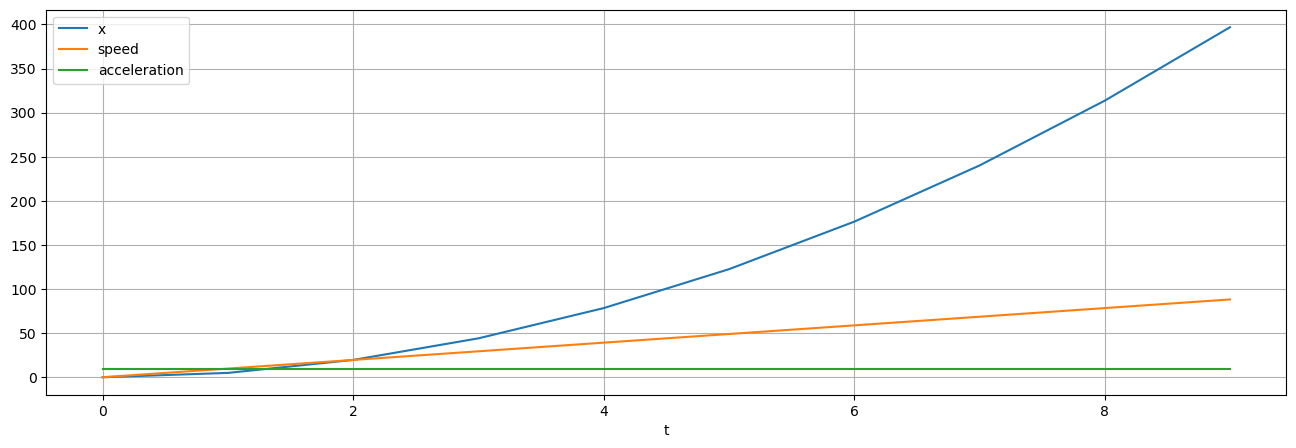

In [41]:
plt.figure(figsize=(16,5))
plt.plot(input_t.numpy(), x.numpy(), label='x')
plt.plot(input_t.numpy(), speed.numpy(), label='speed')
plt.plot(input_t.numpy(), acceleration.numpy(), label='acceleration')
plt.legend()
plt.xlabel('t')
plt.grid()
plt.show()

Все так как и должно быть по физике: расстояние растет квадратично, скорость растет линейно, а ускорение остается постоянным.

В отличие от графического процессора, использование TPU требует явного подключения к работнику TPU. Поэтому необходимо настроить свое обучение на определение логического вывода, чтобы наблюдать ускорение.

TPU - тензорные процессоры

Пример работы с TPU на будущееЖ

- гугл shakespeare_with_tpu_and_keras (colab)
- www.tensorflow.org/guide/tpu

Функции tensorflow призваны ускорить вычисления, давайте посмотрим на следующий пример:

### Строим нейронную сетку

In [42]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, testn_labels) = mnist.load_data()

# Нормализация
train_images = (train_images / 255) * 2 - 1
test_images = (test_images / 255) * 2 - 1

# векторизация
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))\

print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [44]:
# 784 входа -> слой 1 (512 relu нейронов) -> слой 2 (512 linear нейронов) -> 3 слой (10 softmax нейронов). 
# Слои у нас полносвязные (Dense), 3 решающих слоя.
bigger_model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(512, activation='linear'),
    Dense(10, activation='softmax'),
])

bigger_model.compile(optimizer='adam',
                    loss='categorical_crossentropy', 
                    metrics=['accuracy'])
bigger_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Очень простая сеть, с плохой решаюшей силой, поскольку она линейная.

Обучим нашу сеть:

In [45]:
bigger_history = bigger_model.fit(train_images, to_categorical(train_labels, 10), 
                                  epochs=1, 
                                  batch_size=2000, 
                                  validation_split=0.2)

24/24 [==============================] - 1s 15ms/step - loss: 1.2640 - accuracy: 0.6603 - val_loss: 0.4095 - val_accuracy: 0.8767


Работа на GPU и CPU

Строго GPU:

In [46]:
print("On GPU:")
with tf.device("GPU:0"):
    bigger_history = bigger_model.fit(train_images, to_categorical(train_labels, 10), 
                                  epochs=2, 
                                  batch_size=2000, 
                                  validation_split=0.2)

On GPU:
Epoch 1/2
24/24 [==============================] - 0s 11ms/step - loss: 0.3640 - accuracy: 0.8892 - val_loss: 0.2804 - val_accuracy: 0.9185
Epoch 2/2
24/24 [==============================] - 0s 9ms/step - loss: 0.2575 - accuracy: 0.9247 - val_loss: 0.2141 - val_accuracy: 0.9387


In [47]:
print("On CPU:")
with tf.device("CPU:0"):
    bigger_history = bigger_model.fit(train_images, to_categorical(train_labels, 10), 
                                  epochs=2, 
                                  batch_size=2000, 
                                  validation_split=0.2)

On CPU:
Epoch 1/2
24/24 [==============================] - 1s 42ms/step - loss: 0.1971 - accuracy: 0.9433 - val_loss: 0.1756 - val_accuracy: 0.9505
Epoch 2/2
24/24 [==============================] - 1s 28ms/step - loss: 0.1595 - accuracy: 0.9535 - val_loss: 0.1516 - val_accuracy: 0.9573


Видим что по дефолту мы использовали CPU, а не GPU!

Batch - это память. Размер батча поможет нам избежать проблем с памятью. Например, можно чекать память с помощью nvidia-smi

Построим еще моделей:

In [48]:
bigger_model2 = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(512, activation='linear'),
    Dense(10, activation='softmax'),
])

bigger_model2.compile(optimizer='adam',
                    loss='categorical_crossentropy', 
                    metrics=['accuracy'])

bigger_history2 = bigger_model2.fit(train_images, to_categorical(train_labels, 10), 
                                  epochs=5, 
                                  batch_size=2000, 
                                  validation_split=0.2)

Epoch 1/5
24/24 [==============================] - 1s 14ms/step - loss: 1.1944 - accuracy: 0.6799 - val_loss: 0.3733 - val_accuracy: 0.8885
Epoch 2/5
24/24 [==============================] - 0s 8ms/step - loss: 0.3429 - accuracy: 0.8964 - val_loss: 0.2601 - val_accuracy: 0.9216
Epoch 3/5
24/24 [==============================] - 0s 8ms/step - loss: 0.2484 - accuracy: 0.9265 - val_loss: 0.2057 - val_accuracy: 0.9417
Epoch 4/5
24/24 [==============================] - 0s 8ms/step - loss: 0.1953 - accuracy: 0.9434 - val_loss: 0.1714 - val_accuracy: 0.9513
Epoch 5/5
24/24 [==============================] - 0s 8ms/step - loss: 0.1607 - accuracy: 0.9529 - val_loss: 0.1494 - val_accuracy: 0.9584


График изменения точности по эпохам:

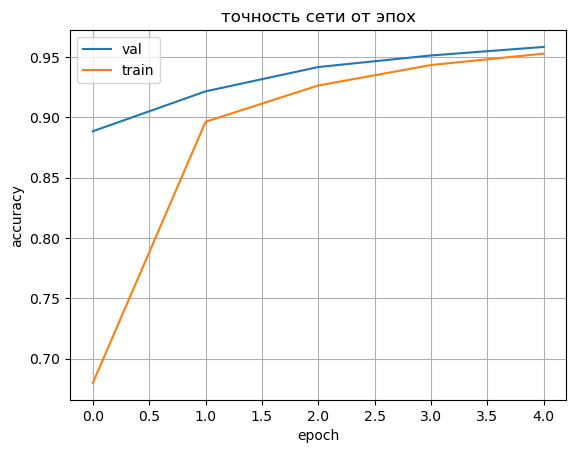

In [49]:
plt.plot(bigger_history2.history['val_accuracy'], label='val')
plt.plot(bigger_history2.history['accuracy'], label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.grid()
plt.show()

И еще одну (сделаем обучение еще на 5 эпохах):

In [55]:
bigger_history3 = bigger_model2.fit(train_images, to_categorical(train_labels, 10), 
                                  epochs=5, 
                                  batch_size=2000, 
                                  validation_split=0.2)

Epoch 1/5
24/24 [==============================] - 0s 11ms/step - loss: 0.0678 - accuracy: 0.9811 - val_loss: 0.0965 - val_accuracy: 0.9713
Epoch 2/5
24/24 [==============================] - 0s 8ms/step - loss: 0.0596 - accuracy: 0.9830 - val_loss: 0.0987 - val_accuracy: 0.9707
Epoch 3/5
24/24 [==============================] - 0s 8ms/step - loss: 0.0534 - accuracy: 0.9849 - val_loss: 0.0899 - val_accuracy: 0.9737
Epoch 4/5
24/24 [==============================] - 0s 8ms/step - loss: 0.0485 - accuracy: 0.9867 - val_loss: 0.0935 - val_accuracy: 0.9725
Epoch 5/5
24/24 [==============================] - 0s 8ms/step - loss: 0.0492 - accuracy: 0.9861 - val_loss: 0.0931 - val_accuracy: 0.9730


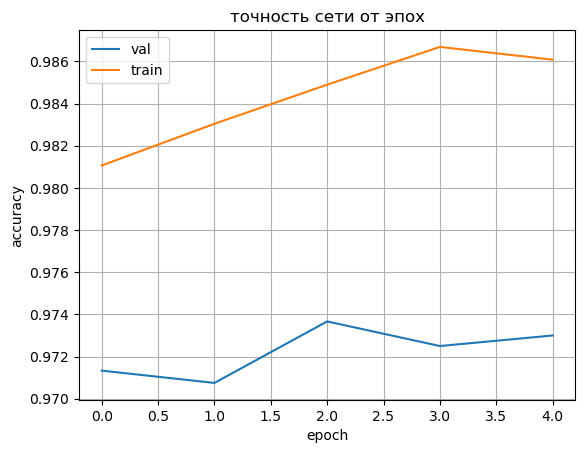

In [56]:
plt.plot(bigger_history3.history['val_accuracy'], label='val')
plt.plot(bigger_history3.history['accuracy'], label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.grid()
plt.show()

Как видим точность на трейне растет, точность на валиде начало падать - переобучение.

### Оптимизаторы

In [52]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad

Epoch 1/5
3/3 [==============================] - 1s 120ms/step - loss: 2.4371 - accuracy: 0.1925 - val_loss: 2.0828 - val_accuracy: 0.3048
Epoch 2/5
3/3 [==============================] - 0s 49ms/step - loss: 2.0322 - accuracy: 0.3318 - val_loss: 1.8807 - val_accuracy: 0.4149
Epoch 3/5
3/3 [==============================] - 0s 48ms/step - loss: 1.8447 - accuracy: 0.4320 - val_loss: 1.7126 - val_accuracy: 0.5111
Epoch 4/5
3/3 [==============================] - 0s 47ms/step - loss: 1.6884 - accuracy: 0.5175 - val_loss: 1.5718 - val_accuracy: 0.5857
Epoch 5/5
3/3 [==============================] - 0s 48ms/step - loss: 1.5564 - accuracy: 0.5831 - val_loss: 1.4516 - val_accuracy: 0.6375
Epoch 1/5
3/3 [==============================] - 1s 115ms/step - loss: 2.7627 - accuracy: 0.1014 - val_loss: 2.1783 - val_accuracy: 0.1989
Epoch 2/5
3/3 [==============================] - 0s 48ms/step - loss: 2.1183 - accuracy: 0.2371 - val_loss: 1.9478 - val_accuracy: 0.3536
Epoch 3/5
3/3 [=================

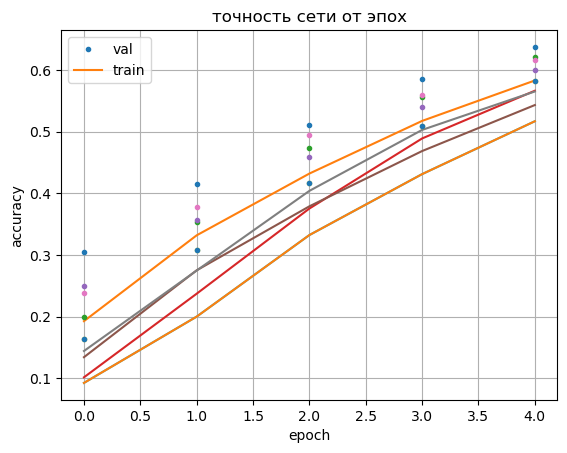

In [57]:
for i in [0,1,2,3,4]:
    bigger_model4 = Sequential([
        Dense(512, activation='relu', input_shape=(784,)),
        Dense(512, activation='linear'),
        Dense(10, activation='softmax'),
    ])
    
    bigger_model4.compile(optimizer='sgd',
                          loss='categorical_crossentropy', 
                          metrics=['accuracy'])
    
    bigger_history4 = bigger_model4.fit(train_images, to_categorical(train_labels, 10), 
                                  epochs=5, 
                                  batch_size=20000, 
                                  validation_split=0.2)
    
    plt.plot(bigger_history4.history['val_accuracy'], '.')
    plt.plot(bigger_history4.history['accuracy'])
    
plt.plot(bigger_history4.history['val_accuracy'], '.', label='val')
plt.plot(bigger_history4.history['accuracy'], label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.grid()
plt.show()

Взяли одну и ту же сеть. Обучили ее несколько раз одинаково. И получили разный результат. Почему? 

**Потому что нейронки каждый раз запускаются с новой точки и каждый раз обучаются по разному!!!**

Чек-поинт нужно тоже выбирать, это гиперпараметр. Можно пробовать фиксировать стартовую точку

### Скорость обучения

Задача на один класс: to_categorical(train_labels, 10)[:,0]

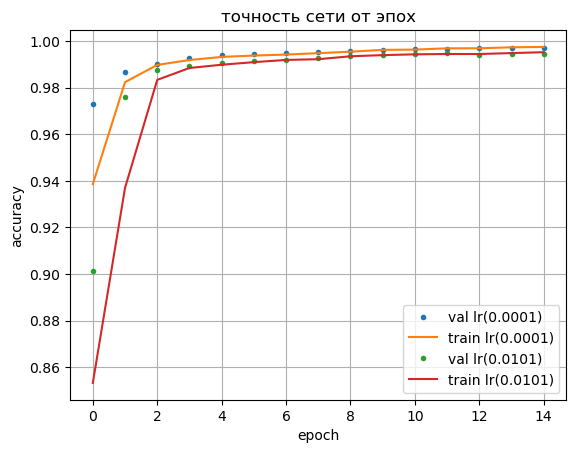

In [58]:
for i in [0,1]:
    bigger_model4 = Sequential([
        Dense(512, activation='relu', input_shape=(784,)),
        Dense(512, activation='linear'),
        Dense(1, activation='sigmoid'), # нейронов на выходе 1 - для одного класса, один выход (бинарный классификатор)
    ])
    
    bigger_model4.compile(optimizer=Adam(learning_rate=0.0001+0.01*i, beta_1=0.89), # beta_1 - некоробочная редко че то меняет
                          loss='binary_crossentropy', 
                          metrics=['accuracy'])
    
    bigger_history4 = bigger_model4.fit(train_images, 
                                        to_categorical(train_labels, 10)[:,0], 
                                        epochs=15,
                                        batch_size=2000, 
                                        validation_split=0.2, 
                                        verbose=0)
    
    plt.plot(bigger_history4.history['val_accuracy'], '.', label='val lr(' + str(0.0001+0.01*i) + ')')
    plt.plot(bigger_history4.history['accuracy'], label='train lr(' + str(0.0001+0.01*i) + ')')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.grid()
plt.show()

Скорость обучения влияет на результаты, как видим

# Классификация изображений одежды

Давайте разберем использование tensorflow 2 на примере датасета с одеждой. В это датасете будут находиться маленькие изображения на белом фоне, такие как кросовки, футболки и прочее.

В данном случае мы будем использовать High API от TensorFlow

In [59]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.10.1


## Импортируем Fashion MNIST датасет

Мы будет использовать следующий датасет -  [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) Этот датасет содержит 70,000 черно-белых изображений в 10 категориях. Изображения имеют разрешение 28x28 пикселей.

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Долгое время в машинном обучение для программ Hello world использовался датасет MNIST с рукописными цифрами. Данный датасет призван несколько усложнить задачу распознования но также подходит в качестве программы Hello world.

В этом датасете 60 000 тренировочных изображений и 10 000 тестовых.

In [60]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Датасет содержит следующие классы:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Каждому классу обозначенному цифрой мы можем присвоить текстовое значение -

In [61]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Анализ датасета 

Давайте посмотрим структуры полученного массива данных:

In [62]:
train_images.shape

(60000, 28, 28)

In [63]:
len(train_labels)

60000

In [64]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Проанализируем тестовую выборку:

In [65]:
test_images.shape

(10000, 28, 28)

In [66]:
len(test_labels)

10000

Сделаем категоризацию:

In [68]:
y_train_labels = to_categorical(train_labels)
y_test_label = to_categorical(test_labels)

In [71]:
y_test_label.shape

(10000, 10)

In [72]:
y_test_label

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Preprocess the data

Давайте взглянем на конкретный пример изображений с помощью matplotlib:

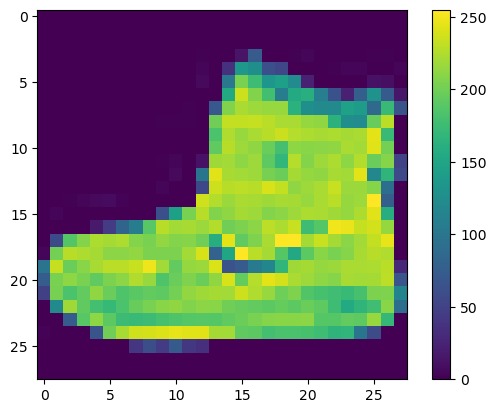

In [73]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Для процесса обучения нейронной сети нам важно перевести данные из диапазона от 0 до 255 в диапазон от 0 до 1:

In [74]:
train_images = train_images / 255.0 # нормировка по диапазону [0, 1]

test_images = test_images / 255.0

Посмотрим первые 25 изображений:

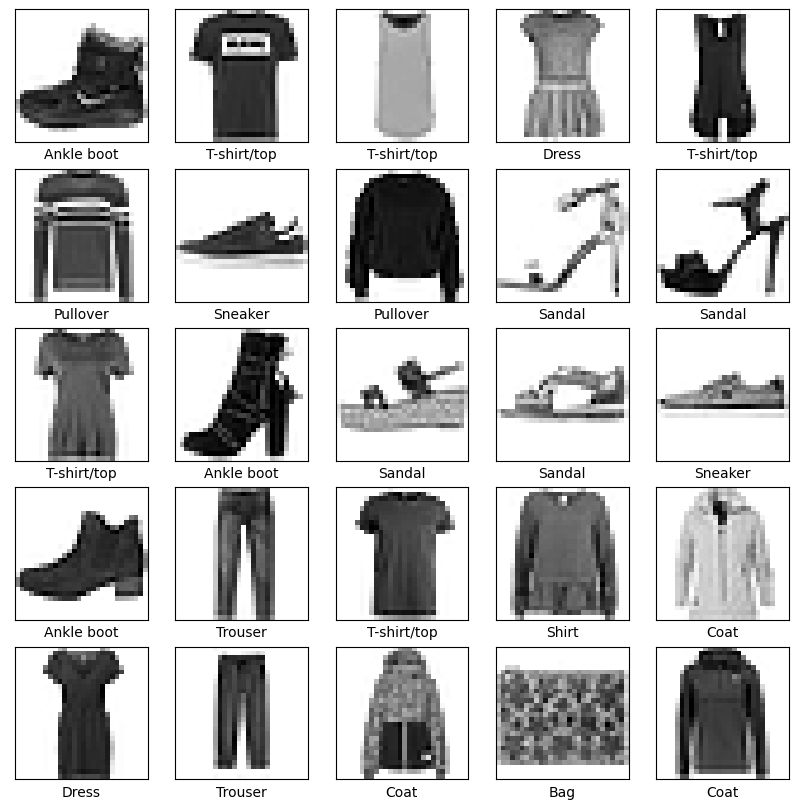

In [75]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Построение модели

Построение нейронной сети подразумевает конфигурацию ее слоев и последующую компиляцию.

### Определение слоев

Давайте создадим 3 слоя нейронной сети с помощью функционала Keras.layers

In [76]:
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.models import Model 
import tensorflow

In [77]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10) # если нет активации, значит выход ЛИНЕЙНЫЙ
])

In [78]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 128)               100480    
                                                                 
 dense_28 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Первый слой, `tf.keras.layers.Flatten`, трасформирует двумерный массив на входе в одномерный массив.

Получившиеся 784(28 x 28) входных нейрона присоединяем к полносвязному слою из 128 нейронов , которые будут использовать функцию активации relu. В выходном слое будет 10 нейронов, по числу классов, которые он должен предсказывать. В нем будет использоваться функция активации softmax и он будет давать предсказание от 0 до 1, где 1 это стопроцентная вероятность.

### Компиляция модели

Давайте вспомним ключевые понятия, которые нам понадобяться при компиляции:

* *Loss function* — меряет как точно работает нейросеть.
* *Optimizer* — определяет способ корректировки весов.
* *Metrics* — определяет за какие характеристики будут отражаться в процессе обучения.

In [79]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Выход у нас линейный, а задача у нас классификации. Мы должны добавить параметр: from_logits=True

То есть мы внутри функции потерь применили СИГМОИД (Сделали его не на выходе, а именно внутри функции потерь...).

Если на выходе softmax или сигмоид для бинарной модели кросс энтропии, тогда from_logits=False

## Тренировка модели

Здесь все стандартно - данные передаются в нейросеть и сопоставляются изображения и лейблы.



### Передача данных в модель

Команда непосредственно запускающая процесс обучения называется - `model.fit`:

In [80]:
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4983 - accuracy: 0.8259
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3722 - accuracy: 0.8649
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3346 - accuracy: 0.8777


In [81]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3794 - accuracy: 0.8632 - 961ms/epoch - 3ms/step

Test accuracy: 0.8632000088691711


В выводе выше мы следим за точностью в процессе обучения, проверяем точность на тестовых даыннх и меняем параметры нейросети если точность на тестовых данных нас не устраивает.

In [82]:
y_p = model.predict(test_images[:1,:,:])

1/1 [==============================] - 0s 57ms/step


In [83]:
y_p

array([[ -7.579238 , -12.435151 ,  -8.603424 , -10.07389  ,  -8.184678 ,
          1.3313776,  -6.956552 ,   1.2465248,  -3.994912 ,   4.8537235]],
      dtype=float32)

Предикт у нас появился до бесконечности, так как на выходе никто его не нормировал.

In [84]:
np.argmax(y_p[0])

9

### Предсказания нейросети

Да мы можем использовать argmax, чтобы таки классифицировать картинку. А можем сделать лучше. Запились к нашей модели еще один слой Softmax, который бы нам все переводил в вероятность и тогда мы бы выбирали уже вероятности.

In [85]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [86]:
probability_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (None, 10)                101770    
                                                                 
 softmax (Softmax)           (None, 10)                0         
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [87]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [88]:
predictions[0].sum()

1.0

Ответ в виде набора вероятностей

In [89]:
predictions[0]

array([3.7708026e-06, 2.9345200e-08, 1.3540534e-06, 3.1118614e-07,
       2.0582306e-06, 2.7942477e-02, 7.0285000e-06, 2.5669290e-02,
       1.3585846e-04, 9.4623786e-01], dtype=float32)

In [90]:
np.argmax(predictions[0])

9

In [91]:
test_labels[0]

9

In [92]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

### Проверка предсказаний

Matplotlib нам дает возможность посмотреть наше предсказание графически:

In [93]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

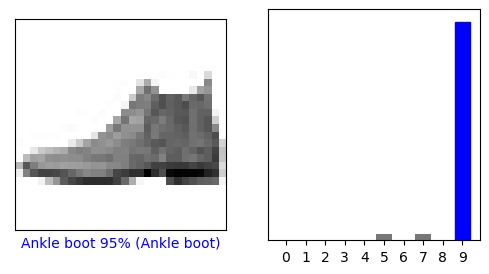

In [94]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

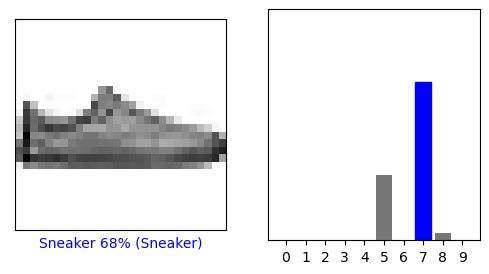

In [95]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Давайте сделаем еще несколько предсказаний - 

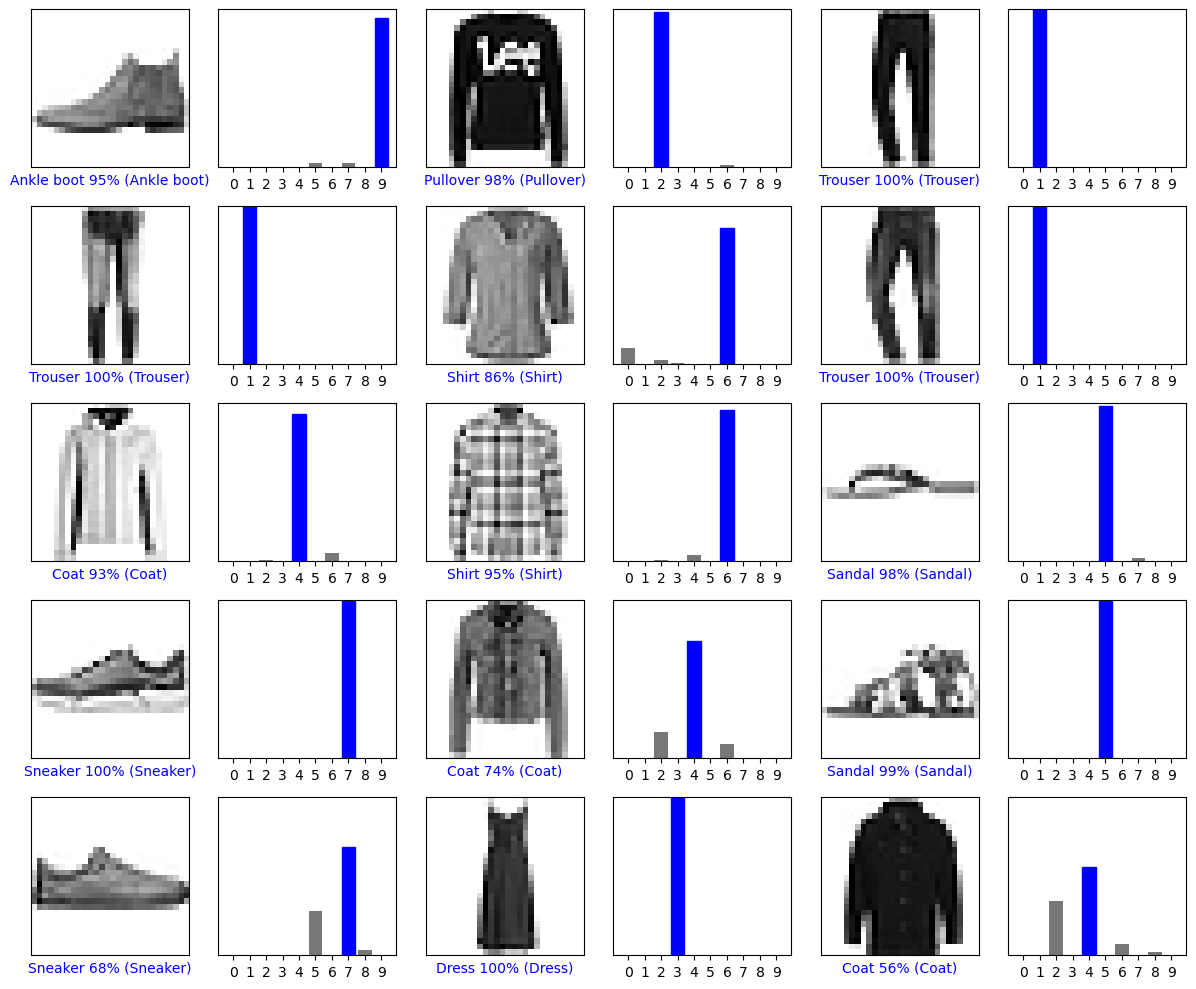

In [96]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Использование полученной модели

Давайте возьмем одно изображение из тестовой выборке и посмотрим предсказание нейронной сети - 

In [97]:
img = test_images[1]

print(img.shape)

(28, 28)


In [98]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [99]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 15ms/step
[[2.4620627e-04 1.7711734e-08 9.8175550e-01 3.1419302e-07 1.6414167e-03
  4.5758708e-10 1.6343977e-02 1.5241945e-10 1.2469650e-05 2.2524149e-11]]


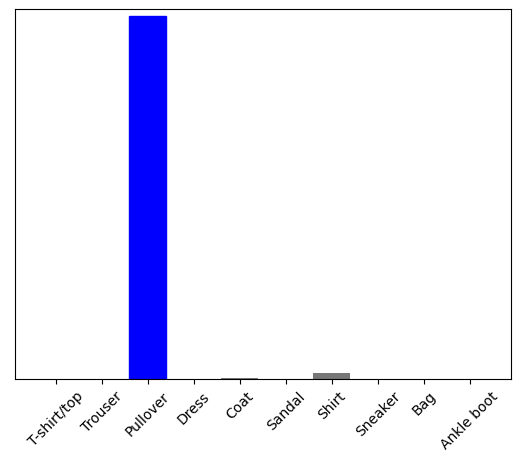

In [100]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`keras.Model.predict` возвращает список списков — по одному списку для каждого предсказания в батче. Нам нужны предсказания только для одного изображения:

In [101]:
np.argmax(predictions_single[0])

2

Нейросеть при хорошо подобранных параметрах должна была выдать корректное предсказание

# Проведем анализ работы модели по слоям

Состояние узлов в сети (пакетам) и слоям можно оценить, используя средства tensorflow через объект GradientTape() - исполняет шаг вычисления градиента для модели по ее loss для всех тренируемых вес


In [102]:
import tensorflow.nn as nn

tensorflow слизал структуру своей либы с pytorch

In [103]:
# собираем сеть вручную!

level = 20 # сетка из 20 слоев
inputs = Input(shape=(28,28), name='digits')
x=Flatten()(inputs)
for i in range(level):
    x = Dense(64, name='dense_'+str(i))(x) # создали слой и сразу ему передали на вход 'x'
    x = nn.sigmoid(x) # функция активации
x = Dense(10, name='predictions')(x)
outputs = nn.softmax(x)
modelg = Model(inputs=inputs, outputs=outputs)

# Создаем экземпляр оптимизатора
optimizer = tensorflow.keras.optimizers.SGD(learning_rate=1e-3)
# Instantiate a loss function
loss_fn = tensorflow.keras.losses.MeanSquaredError() # from_logits=True
# Подготовим тренировочной датасет
batch_size = 64
# Итерируем по эпохам
grad_log=[]
# эпохи
epochs = 2

for epoch in range(epochs):
    print(f'Начинаем эпоху {epoch}')
    # Итерируем по пакетам в датасете
    
    for step, (x_batch_train, y_batch_train) in enumerate(zip(train_images[:100,:,:], y_train_labels[:100])):
        # Откроем GradientTape, чтобы записать операции выполняемые во время прямого прохода, включающего автодифференцирование
        with tensorflow.GradientTape() as tape:
            # Запустим прямой проход слоя.
            # Операции применяемые слоем к своим входым данным будут записаны на GradientTape
            loggits = modelg(x_batch_train.reshape((1,28,28)))
            # loggits для пакета - выходы модели.
            # Вычислим значение потерь для этого пакета.
            y_batch_train=y_batch_train.reshape(1,10)
            y_s = y_batch_train.shape
            y = tf.reshape(y_batch_train, shape=(y_s[0], 10, 1))
            l = tf.reshape(loggits, shape=(y_s[0],10,1))
            # вызываем лосс
            loss_value=loss_fn(y, l)
            # Используем gradient tape для автоматического извлечения градиентов обучаемых моделей переменных относительно потерь
            grads = tape.gradient(loss_value, modelg.trainable_weights) # градиенты для всех весов
            g_g=[]
            w_w=[]
            # пишем логи для сохранения значений градиента и веса по одной цепи
            for g_s in grads:
                if len(g_s.numpy().shape) == 1:
                    g_g.append(g_s.numpy()[0])
                if len(g_s.numpy().shape) == 2:
                    g_g.append(g_s.numpy()[0,0])
                if len(g_s.numpy().shape) == 3:
                    g_g.append(g_s.numpy()[0,0,0])
                if len(g_s.numpy().shape) == 4:
                    g_g.append(g_s.numpy()[0,0,0,0])
                    
        # добавляем текущие логи по слоям к общей записи
        grad_log.append(g_g)
        # выполним один шаг градиентоного спуска обновив значение переменных минимизирующих потери.\
        optimizer.apply_gradients(zip(grads, modelg.trainable_weights))
        # пишем лог каждые 200 пакетов
        if step % 20 == 0:
            print("Потери на обучении (для одного пакета) на шаге %s: %s " % (step, float(loss_value)))
            print("Уже увидели: %s примеров" % ((step+1)*batch_size))
grad_log = np.array(grad_log)

Начинаем эпоху 0
Потери на обучении (для одного пакета) на шаге 0: 0.11259617656469345 
Уже увидели: 64 примеров
Потери на обучении (для одного пакета) на шаге 20: 0.11228934675455093 
Уже увидели: 1344 примеров
Потери на обучении (для одного пакета) на шаге 40: 0.11055771261453629 
Уже увидели: 2624 примеров
Потери на обучении (для одного пакета) на шаге 60: 0.11673484742641449 
Уже увидели: 3904 примеров
Потери на обучении (для одного пакета) на шаге 80: 0.06398846209049225 
Уже увидели: 5184 примеров
Начинаем эпоху 1
Потери на обучении (для одного пакета) на шаге 0: 0.11245449632406235 
Уже увидели: 64 примеров
Потери на обучении (для одного пакета) на шаге 20: 0.11213965713977814 
Уже увидели: 1344 примеров
Потери на обучении (для одного пакета) на шаге 40: 0.11040101200342178 
Уже увидели: 2624 примеров
Потери на обучении (для одного пакета) на шаге 60: 0.11662088334560394 
Уже увидели: 3904 примеров
Потери на обучении (для одного пакета) на шаге 80: 0.06416131556034088 
Уже увиде

In [104]:
modelg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_0 (Dense)             (None, 64)                50240     
                                                                 
 tf.math.sigmoid (TFOpLambda  (None, 64)               0         
 )                                                               
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 tf.math.sigmoid_1 (TFOpLamb  (None, 64)               0         
 da)                                                         

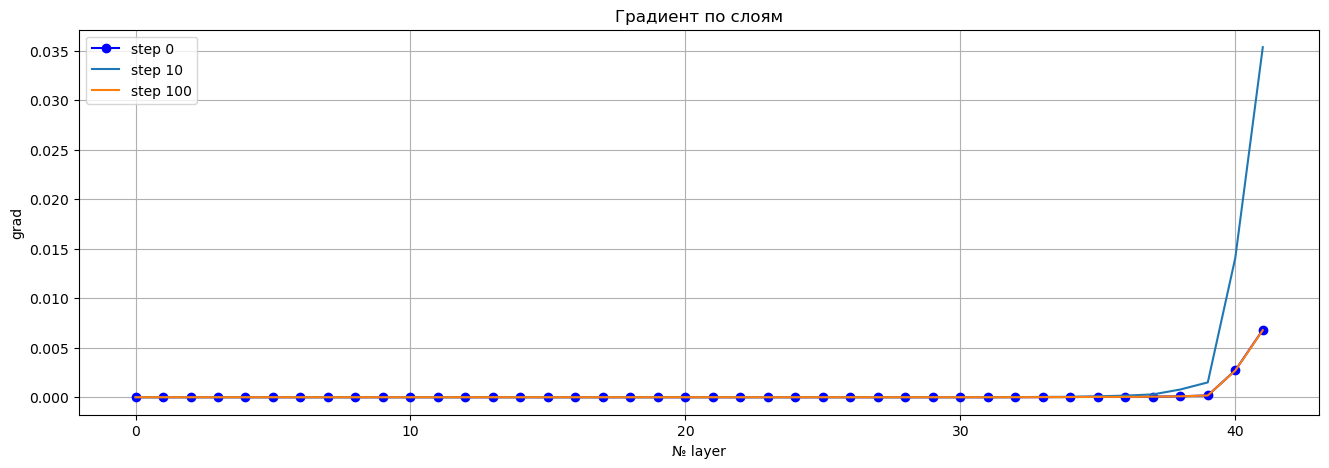

In [105]:
plt.figure(figsize=(16,5))
plt.title('Градиент по слоям')
plt.xlabel('№ layer')
plt.ylabel('grad')
plt.grid()
plt.plot(np.abs(grad_log[0,:]), '-ob', label='step 0')
plt.plot(np.abs(grad_log[10,:]), label='step 10')
plt.plot(np.abs(grad_log[100,:]), label='step 100')
plt.legend()
plt.show()

На выходе градиент очень большой (10 шагов).

Мы видим, что до 30 слоя вообще в принципе ничего не происходит. Это называется градиентное затухание. Градиентные затухания не позволяет делать глубокие сети. Что делать?

* Перейти к другой функции активации. Это аргумент за использование ReLU функции.

### Сделаем анализ ошибок модели

In [106]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [107]:
y_pred = np.argmax(probability_model.predict(test_images), axis=1)
y_pred[:10]

313/313 [==============================] - 0s 1ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [108]:
CM = confusion_matrix(test_labels, y_pred)
print(CM)

[[744   1  10  28   1   1 203   0  12   0]
 [  7 948   0  35   4   0   4   0   2   0]
 [ 10   0 766  18  80   0 124   0   2   0]
 [ 18   2   4 898  18   0  56   0   4   0]
 [  0   1  97  54 708   0 135   0   5   0]
 [  0   0   0   1   0 936   0  27   3  33]
 [ 85   1  81  29  41   0 751   0  12   0]
 [  0   0   0   0   0  22   0 952   0  26]
 [  1   0   2   6   4   2  10   3 972   0]
 [  0   0   0   0   0   2   1  40   0 957]]


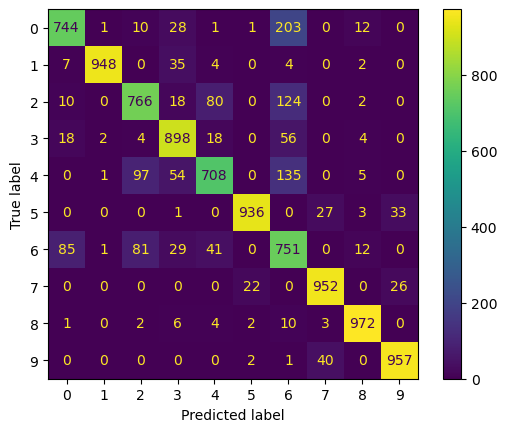

In [109]:
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=np.arange(10))

disp.plot(values_format='.3g')
plt.show()

Смотрим как классы смешиваются с другими: матрица путаницы

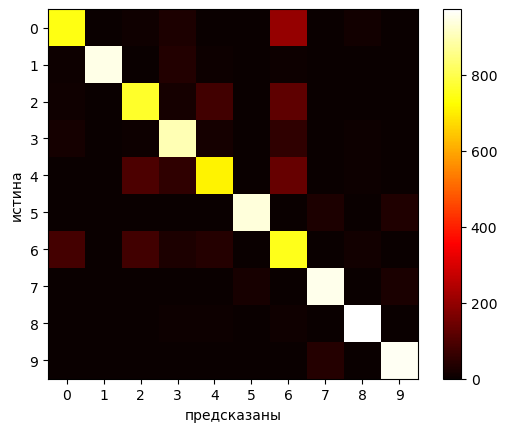

In [110]:
plt.imshow(CM, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.yticks(ticks=np.arange(10))
plt.xticks(ticks=np.arange(10))
plt.xlabel('предсказаны')
plt.ylabel('истина')
plt.show()

Классы неодинаково распознаются. Сеть делает ошибки... Что мы можем сделать с этим фактом? 

Например, можно сделать комбинацию сетей (ансамбль). Проверим вариант усреднения.

Нейросеть при хорошо подобранных параметрах должны была выдать корректное предсказание

Реализуем одинаковые сети в разном стиле: 

* model1 - линейная модель через список
* model2 - линейная модель через добавление слоев по очереди
* model3 - модель через функциональное описание

У всех 3х сетей предпоследний слой линейный (это неправильно для классификации и сделано, чтобы модель была совсем простой!!!!)

In [112]:
keras.__version__

'2.10.0'

In [127]:
# заполняем модель 
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

# заполняем модель, добавляя слои последовательно
model2 = keras.Sequential()
model2.add(keras.layers.Flatten(input_shape=(28,28))),
model2.add(keras.layers.Dense(256, activation='linear')),
model2.add(keras.layers.Dense(10, activation='softmax'))

# заполняем модель, формируя граф передачи тензоров
x_input = keras.layers.Input(shape=(28,28))
x3 = keras.layers.Flatten()(x_input)
x3 = keras.layers.Dense(128, activation='relu')(x3)
x_output = keras.layers.Dense(10, activation='softmax')(x3)

model3 = keras.models.Model(x_input, x_output)

model1.compile(optimizer='sgd', 
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])
model2.compile(optimizer='rmsprop', 
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])
model3.compile(optimizer='adam', 
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

hist1 = model1.fit(train_images, train_labels, epochs=10, batch_size=2000)
hist2 = model2.fit(train_images, train_labels, epochs=10, batch_size=2000)
hist3 = model3.fit(train_images, train_labels, epochs=10, batch_size=2000)

Epoch 1/10
 1/30 [>.............................] - ETA: 5s - loss: 2.4539 - accuracy: 0.0750

C:\Users\kikoooiemama\anaconda3\envs\start_nn\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


30/30 [==============================] - 1s 13ms/step - loss: 2.3408 - accuracy: 0.0977
Epoch 2/10
30/30 [==============================] - 0s 4ms/step - loss: 2.2266 - accuracy: 0.1777
Epoch 3/10
30/30 [==============================] - 0s 4ms/step - loss: 2.1504 - accuracy: 0.3232
Epoch 4/10
30/30 [==============================] - 0s 4ms/step - loss: 2.0816 - accuracy: 0.4623
Epoch 5/10
30/30 [==============================] - 0s 4ms/step - loss: 2.0171 - accuracy: 0.5423
Epoch 6/10
30/30 [==============================] - 0s 4ms/step - loss: 1.9562 - accuracy: 0.5879
Epoch 7/10
30/30 [==============================] - 0s 4ms/step - loss: 1.8988 - accuracy: 0.6155
Epoch 8/10
30/30 [==============================] - 0s 4ms/step - loss: 1.8446 - accuracy: 0.6361
Epoch 9/10
30/30 [==============================] - 0s 4ms/step - loss: 1.7933 - accuracy: 0.6508
Epoch 10/10
30/30 [==============================] - 0s 4ms/step - loss: 1.7449 - accuracy: 0.6572
Epoch 1/10
30/30 [===========

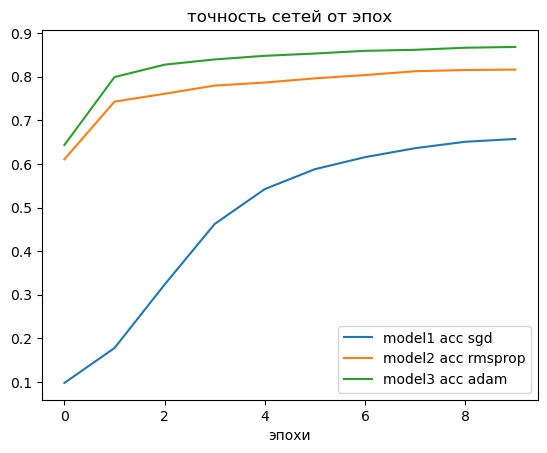

In [128]:
plt.plot(hist1.history['accuracy'], label='model1 acc sgd')
plt.plot(hist2.history['accuracy'], label='model2 acc rmsprop')
plt.plot(hist3.history['accuracy'], label='model3 acc adam')
plt.title('точность сетей от эпох')
plt.xlabel('эпохи')
plt.legend()
plt.show()

Собираем их этих сетей решение

In [129]:
y_pred1 = np.argmax(model1.predict(test_images), axis=1)
y_pred2 = np.argmax(model2.predict(test_images), axis=1)
y_pred3 = np.argmax(model3.predict(test_images), axis=1)

CM1 = confusion_matrix(test_labels, y_pred1)
CM2 = confusion_matrix(test_labels, y_pred2)
CM3 = confusion_matrix(test_labels, y_pred3)

313/313 [==============================] - 0s 988us/step


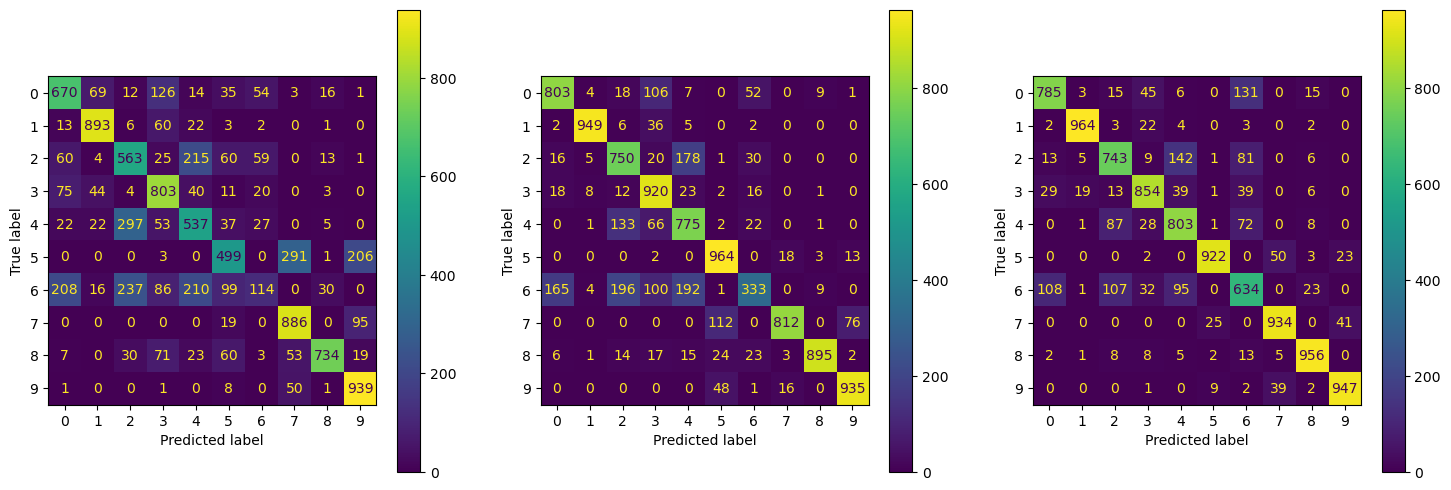

In [130]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))
disp1 = ConfusionMatrixDisplay(confusion_matrix=CM1, display_labels=np.arange(10))
disp1.plot(ax=ax1, values_format='.3g')
disp2 = ConfusionMatrixDisplay(confusion_matrix=CM2, display_labels=np.arange(10))
disp2.plot(ax=ax2, values_format='.3g')
disp3 = ConfusionMatrixDisplay(confusion_matrix=CM3, display_labels=np.arange(10))
disp3.plot(ax=ax3, values_format='.3g')
plt.show()

In [131]:
# сохраним модели на диск
model1.save_weights('models/model1.h5')
model2.save_weights('models/model2.h5')
model3.save_weights('models/model3.h5')

# прочитать модели с диска:
# model.load_weights('models/model.h5')

Выгрузим на локальную машину нашу модель

In [132]:
# from google.colab import files

# files.download('models/model1.h5')

### Ансамбль сетей

Использование функционального API для построения сложный сетей

In [134]:
# model 1
input1 = keras.layers.Input(shape=(28,28))
x1 = keras.layers.Flatten()(input1)
x1 = keras.layers.Dense(128, activation='relu')(x1)
x1 = keras.layers.Dense(10, activation='softmax')(x1)
model11 = keras.models.Model(inputs=input1, outputs=x1)

# model 2
x2 = keras.layers.Flatten()(input1)
x2 = keras.layers.Dense(256, activation='relu')(x2)
x2 = keras.layers.Dense(10, activation='softmax')(x2)
model22 = keras.models.Model(inputs=input1, outputs=x2)

# model 3
x3 = keras.layers.Flatten()(input1)
x3 = keras.layers.Dense(256, activation='relu')(x3)
x3 = keras.layers.Dense(10, activation='softmax')(x3)
model33 = keras.models.Model(inputs=input1, outputs=x3)

# усредняем выхоы сетей
out_all = keras.layers.Average()([model11.output, model22.output, model33.output])
out_all = keras.layers.Softmax()(out_all)

model_all = keras.models.Model(inputs = [input1], outputs = out_all)
model_all.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1, epsilon=1e-08, decay=0.0), 
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                  metrics=['accuracy'])

# загружаем веса отдельно обученных моделей.
# model11.load_weights('models/model1.h5') 
# model22.load_weights('models/model2.h5')
# model33.load_weights('models/model3.h5')

In [135]:
tf.keras.optimizers.Adam()

In [136]:
model_all.summary()

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten_21 (Flatten)           (None, 784)          0           ['input_6[0][0]']                
                                                                                                  
 flatten_22 (Flatten)           (None, 784)          0           ['input_6[0][0]']                
                                                                                                  
 flatten_23 (Flatten)           (None, 784)          0           ['input_6[0][0]']                
                                                                                           

Визуализация сетки

In [137]:
from tensorflow.keras.utils import plot_model

In [142]:
plot_model(model_all, to_file='new_model_all.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Предсказание на ансамбле

In [143]:
predictions_single = model_all.predict([img])
print(predictions_single)

1/1 [==============================] - 0s 63ms/step
[[0.09425586 0.10652328 0.09728288 0.09404202 0.09495877 0.09956431
  0.10061608 0.10335823 0.10008081 0.10931775]]


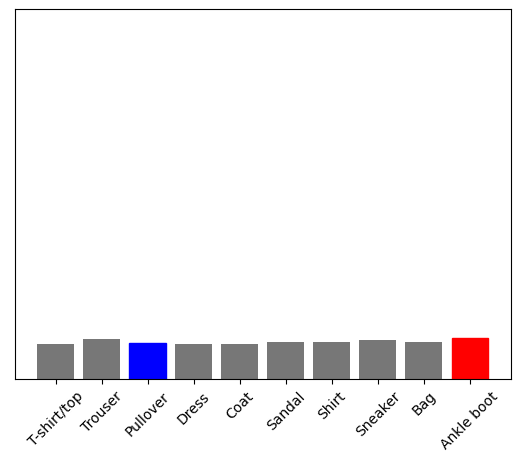

In [148]:
plot_value_array(1, predictions_single[0], test_labels) 
_ = plt.xticks(range(10), class_names, rotation=45)

In [149]:
y_test_pred = model_all.predict([test_images[:10,:,:]])

1/1 [==============================] - 0s 17ms/step


In [150]:
np.argmax(y_test_pred, axis=1)

array([9, 9, 7, 7, 9, 6, 6, 9, 6, 6], dtype=int64)

In [151]:
test_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [152]:
model_all.save('models/model_all.h5')

In [154]:
y_pred_all = np.argmax(model_all.predict([test_images]), axis=1)

313/313 [==============================] - 1s 2ms/step


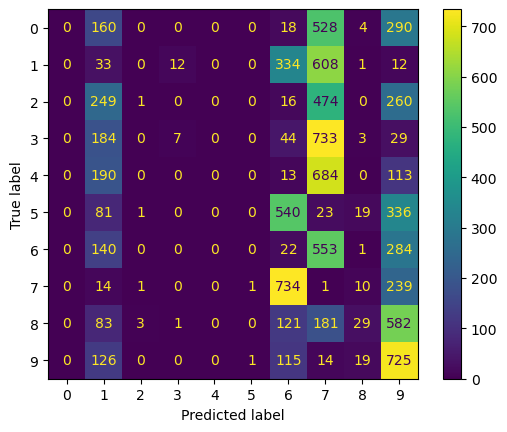

In [155]:
CM_ALl = confusion_matrix(test_labels, y_pred_all)
disp_all = ConfusionMatrixDisplay(confusion_matrix=CM_ALl, display_labels=np.arange(10))
disp_all.plot(values_format='.3g')
plt.show()

Также можно отделить плохой класс от остальных новой моделью:
* обучаем класс 6 против всех
* выход стал бинарным на выходе часть вектора про 6й класс (выборка разбалансирована)
* по итогам такой классификации отделим

In [156]:
input6 = keras.layers.Input(shape=(28,28))
x6 = keras.layers.Flatten()(input6)
x6 = keras.layers.Dense(256, activation='relu')(x6)
x6 = keras.layers.Dense(1, activation='sigmoid')(x6)

model6 = Model(inputs=input6, outputs=x6)
model6.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1, epsilon=1e-08, decay=0.0), 
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
                  metrics=['accuracy'])
model6.fit(train_images, y_train_labels[:,6], epochs=10, validation_split=0.2)

Epoch 1/10
   1/1500 [..............................] - ETA: 5:00 - loss: 0.5802 - accuracy: 0.7812

C:\Users\kikoooiemama\anaconda3\envs\start_nn\lib\site-packages\keras\backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 [==============================] - 5s 3ms/step - loss: 0.1964 - accuracy: 0.9177 - val_loss: 0.1558 - val_accuracy: 0.9369
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1590 - accuracy: 0.9321 - val_loss: 0.1588 - val_accuracy: 0.9310
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1479 - accuracy: 0.9371 - val_loss: 0.1481 - val_accuracy: 0.9374
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1406 - accuracy: 0.9401 - val_loss: 0.1407 - val_accuracy: 0.9406
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1344 - accuracy: 0.9430 - val_loss: 0.1501 - val_accuracy: 0.9364
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1298 - accuracy: 0.9460 - val_loss: 0.1338 - val_accuracy: 0.9429
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1255 - accuracy: 0.9466 - val_loss: 0.1322 - val_accuracy: 0.9439
Epo

Это уже типо СТЭКИНГ (СКЛЕИВАНИЕ СЕТОК)

## Практическое задание

0. Попробуйте улучшить работу нейронной сети (разобранную на уроке), обучавшейся на датасет Fashion-MNIST. Опишите в комментарии к уроку - какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора) на датасет from sklearn.datasets import load_boston.

2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

## Дополнительные материалы

<ol>
    <li>www.tensorflow.org/api_docs</li>
</ol>

## Используемая литература 

Для подготовки данного методического пособия были использованы следующие ресурсы:
<ol>
    <li>https://www.tensorflow.org/</li>
    <li>https://www.tensorflow.org/tutorials/keras/classification</li>
    <li>Singh P., Manure A. - Learn TensorFlow 2.0 - 2020</li>
    <li>Шакла Н. — Машинное обучение и TensorFlow 2019</li>
    <li>Википедия</li>
    
</ol>